<a href="https://colab.research.google.com/github/sunvince9204/Weekly_notes/blob/main/Lecture4NumpyMatplotlib_nosol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# numpy and matplotlib

*Newly arrived in San Francisco, walking along Pier 39, Cynthia was approached by a Black man wearing a red bow tie and suit.  He asked Cynthia's name, and she gave it.*

<i><p>"Cynthia, can I interest you in helping to fight Bleeding Nail Disease?" the man asked, producing a sheet of numbers from his breast pocket.  "Here are our projected population numbers for the next two years.  As you can see, things are quite dire."</p>
<br>
"I'll take a look," Cynthia said, as she would say about any random flyer.</p>

<p>"If you're interested, come back tomorrow!" the man said, and he moved on to another passerby.</p>
</i>

*She kept the paper, but thought, who is going to be moved by this page full of numbers?  Where was the visualization?*

# Two major libraries:  numpy and matplotlib

Today we'll introduce you to two of the most important libraries for data science.  Numpy stands for "numerical python" and contains many tools essential for working with data.  matplotlib is named after its goal of having plotting tools as nice as matlab's.  We'll demonstrate some of the most essential tools here.

# Importing numpy and matplotlib

While we could just write "import numpy" and "import matplotlib," this would require us to type out "numpy" or "matplotlib" before every function call from these modules.  Instead, it's conventional to rename these modules or their libraries to conventional abbreviations, resulting in less typing.  Thus:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

If we wanted just a particular function to import, we could write something like the following:

In [ ]:
from numpy import mean
print(mean([3,4,5]))
#Or...
from numpy import mean as avg
print(avg([3,4,5]))

4.0
4.0


# Numpy, vectors, and matrices

A *vector* is a sequence of numbers.  There are many ways to represent an array in Python, but one is more efficient, meaning the code will run faster.  That is the *array* in the numpy module.

Here is how to create 1D and 2D numpy arrays.

lists and arrays are very similiar but arrays are more used for mathematical functions and lists are used more for sorting.

In [ ]:
v = np.array([1,2,3])
A = np.array([[1,0,0,0],[0,2,0,0],[0,0,3,0],[0,0,0,4]])  # 3x3 with 1,2,3 along the diagonal

One thing that arrays can do but lists can't is called broadcasting.  When a number is added to a vector, it's added to all the elements of the vector.  The same thing goes for multiplication, raising to a power, and some other mathematical operations - they're applied element by element to the whole array.

In [ ]:
print(v)
print(v + 1)
#v does not change from first operation so all opperations using v is using the original vector
print(v * 2)
print(v ** 2)
v2 = np.array([1, 1, 1])
print(v+v2)

[1 2 3]
[2 3 4]
[2 4 6]
[1 4 9]
[2 3 4]


Numpy also makes matrix multiplication easy; it's @ in numpy.  Matrix multiplication by a vector creates a new vector where each element is a weighted sum of the original vector.  It's a fundamental operation in linear algebra, useful in statistics and machine learning.  For example, the effects of a layer of a neural network can be described as a matrix multiplication.

In [ ]:
print(A)  # 1,2,3 along diagonal, 0 elsewhere
print(v)  # 1,2,3
# when multiplying a single vecor by a matrix line, the last index inside the single vector carries over multiple times.
A @ v

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[1 2 3]


array([1, 4, 9])

Matrix-matrix multiplication is possible with @, too.  This combines two matrices A and B into one that has the effect of doing one, then the other, when multiplied.

In [ ]:
A @ A

array([[ 1,  0,  0,  0],
       [ 0,  4,  0,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  0, 16]])

It's very common to want to know the dimensions of an array of data - you may have just loaded the dataset without knowing how many rows of data are in it.  The shape *attribute* of an array (such as a matrix) is a *tuple* that tells you its dimensions.  (An attribute tells you something about the object it's attached to.  And a tuple is very much like a list, but different in ways I'll explain later.)

In [ ]:
print(A.shape)  # Tuples: like lists, but use () instead of []
print(v.shape)  # 1d outputs a comma to indicate it's still a tuple
# prints in (row, column)

(3, 3)
(3,)


# Slicing

One very convenient thing that you can do with numpy arrays (which you can also do with lists and strings) is "slicing," or grabbing values between particular indices.  The syntax for a 1D array is my_array[first_included_index:first_excluded_index], so the second index isn't in the result.

printing an array will not show commas

In [ ]:
my_array = np.array([8, 6, 7, 5, 3, 0, 9])
print(my_array[1:3]) # prints index 1 and 2, not 3

[6 7]


In [ ]:
# Slicing other data types
#type function prints out data type
my_string = "dysfunctional"
print(type(my_string))
print(my_string[3:6])
my_list = ['j', 'o', 'k','e']
print(my_list[1:3])

<class 'str'>
fun
['o', 'k']


Numpy autoformats arrays based on number of dimentions , aligning the columns within each row.

In [ ]:
import numpy as np
np.array([[1,2,3],[4,5,6],[7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
#Create a one-dimensional array from a list comprehension that produces the even integers 2 through 20
import numpy as np
# x for x in range() creates an array that contains every number from range(starting, until, by increments of)
np.array([x for x in range(2, 21, 2)])

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

Leaving off the second number means all the rest of the indices will be included.  Leaving off the first means all elements before the index after the colon will be included.

In [ ]:
my_array = np.array([8, 6, 7, 5, 3, 0, 9])
my_array[1:]

array([6, 7, 5, 3, 0, 9])

In [ ]:
my_array [:3]

array([8, 6, 7])

This all works in a similar way for the 2D case.  Slicing 2D arrays is very common when dealing with datasets.  You may choose to be interested in only certain rows, representing certain datapoints, or certain columns, representing certain features.

One detail is that the ranges are comma-separated.  (You might be tempted to use double-square-brackets if you thought of them as list-of-lists.)

In [ ]:
0# Could suppose this is data where each row is an observation
# of latitude, longitude, and temperature
my_matrix = np.array([[42.3,71.1,92],[40.7,70.0,85],[47.6,122.0,82]])
# Now we decide to drop the first datapoint
# and only care about latitude/longitude
# the first list argument iterates through the outside list and the second one iterates through the inside list
two_by_two_square = my_matrix[1:,:2]
x = []
for i in my_matrix:
  for j in i:
    print(j)
    x.append(j)
print(x)
print(two_by_two_square)

42.3
71.1
92.0
40.7
70.0
85.0
47.6
122.0
82.0
[42.3, 71.1, 92.0, 40.7, 70.0, 85.0, 47.6, 122.0, 82.0]
[[ 40.7  70. ]
 [ 47.6 122. ]]


A colon alone refers to grabbing all rows or columns.

In [ ]:
no_last_column = my_matrix[:,:2] # no temperature
print(no_last_column)

[[ 42.3  71.1]
 [ 40.7  70. ]
 [ 47.6 122. ]]


Here's an example with a real dataset.

In [ ]:
import sklearn.datasets

cancer_data = sklearn.datasets.load_breast_cancer()
# Rows are individual cancer instance features, like size of tumor
one_record = cancer_data.data[0,:]  # Get one cancer record of the list in index zero of the list of lists
print(one_record)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [ ]:
# Use just five features of the data and ignore the rest,: means from all the lists inside the cancer list, and 0:5 means
#the just takes 5 columns of each the rows
just_five_features = cancer_data.data[:,0:5]
print(just_five_features)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 8.581e+02 8.455e-02]
 [2.060e+01 2.933e+01 1.401e+02 1.265e+03 1.178e-01]
 [7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02]]


# A useful initializer

If your code is going to count things, it's common to want to create a matrix or vector that is zero to start, so that other values can be added to this.  The zeros() function handily creates matrices that are all zeros, of arbitrary size.

The only confusing thing is that zeros() requires an extra set of parentheses from what you'd expect.  This is because it technically only takes one argument, a *tuple* with the row and column count contained in parentheses.  Again, we'll cover tuples in more detail next time.

In [ ]:
print(np.zeros((2,3))) # create a 2x3 matrix of zeros

[[0. 0. 0.]
 [0. 0. 0.]]


There are many other numpy functions - you can browse https://numpy.org/doc/stable/reference/ to see what's available.

# Exercise:  Slicing (2 min)

Using the cancer data defined above, store the first 3 columns of the first 100 datapoints in the variable cancer_subset.  Verify that your data is the right size with .shape.

In [ ]:
# TODO
import sklearn.datasets

cancer_data = sklearn.datasets.load_breast_cancer()
stored = cancer_data.data[:100,0:3]
print(stored)
#.shape tells yout he rows, columns
stored.shape

[[ 17.99   10.38  122.8  ]
 [ 20.57   17.77  132.9  ]
 [ 19.69   21.25  130.   ]
 [ 11.42   20.38   77.58 ]
 [ 20.29   14.34  135.1  ]
 [ 12.45   15.7    82.57 ]
 [ 18.25   19.98  119.6  ]
 [ 13.71   20.83   90.2  ]
 [ 13.     21.82   87.5  ]
 [ 12.46   24.04   83.97 ]
 [ 16.02   23.24  102.7  ]
 [ 15.78   17.89  103.6  ]
 [ 19.17   24.8   132.4  ]
 [ 15.85   23.95  103.7  ]
 [ 13.73   22.61   93.6  ]
 [ 14.54   27.54   96.73 ]
 [ 14.68   20.13   94.74 ]
 [ 16.13   20.68  108.1  ]
 [ 19.81   22.15  130.   ]
 [ 13.54   14.36   87.46 ]
 [ 13.08   15.71   85.63 ]
 [  9.504  12.44   60.34 ]
 [ 15.34   14.26  102.5  ]
 [ 21.16   23.04  137.2  ]
 [ 16.65   21.38  110.   ]
 [ 17.14   16.4   116.   ]
 [ 14.58   21.53   97.41 ]
 [ 18.61   20.25  122.1  ]
 [ 15.3    25.27  102.4  ]
 [ 17.57   15.05  115.   ]
 [ 18.63   25.11  124.8  ]
 [ 11.84   18.7    77.93 ]
 [ 17.02   23.98  112.8  ]
 [ 19.27   26.47  127.9  ]
 [ 16.13   17.88  107.   ]
 [ 16.74   21.59  110.1  ]
 [ 14.25   21.72   93.63 ]
 

(100, 3)

# Matplotlib:  2D line and scatter plots

Matplotlib's plt.plot() function has a great deal of functionality.  In its most basic form, it takes a list of $n$ $x$ coordinates and a list of $n$ $y$ coordinates, and it plots lines connecting the implied points $(x_0,y_0),\ldots,(x_{n-1},y_{n-1})$.

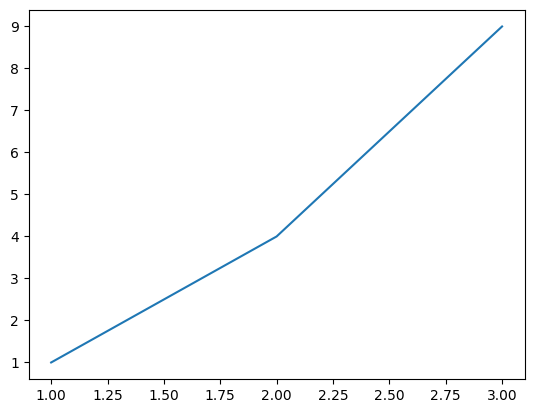

In [ ]:
import matplotlib.pyplot as plt
# in this case, the coordinates are (1,1), (2,4), (3,9)
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x,y)

If the points are represented as a list-of-lists, you may need to slice to grab the first column's x coordinates and the second column's y coordinates.

[[2 1]
 [3 4]
 [5 6]]


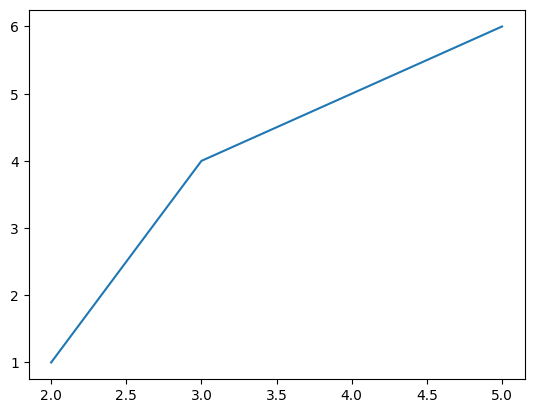

In [ ]:
my_points = np.array([[2,1], [3,4], [5,6]]) # Each list is a point
print(my_points)
#my_points[:,0] is going into the WHOLE my_points array and taking ALL the x values which is at index 0 for each list.
#my_points[:,1] is going into th WHOLE my_points array and taking ALL the y values which is at index 1 of each list
plt.plot(my_points[:,0], my_points[:,1])    # Slice to get x values separate from y values

A scatterplot is achievable with plt.plot() by just handing it an 'o' (lowercase o) as a third argument.  You can also hand it a color abbreviation as part of the same string to plot in a different color.

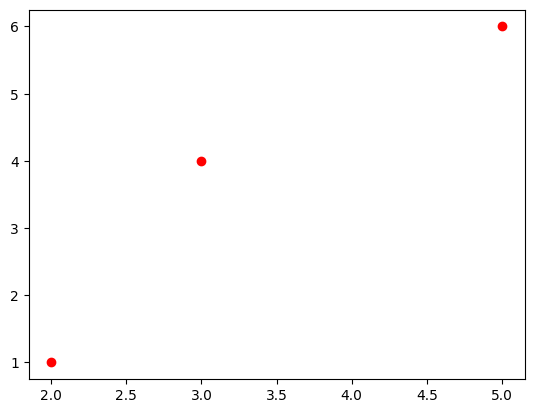

In [ ]:
plt.plot(my_points[:,0], my_points[:,1],'ro') # 'r' is for red, 'o' is for circles o is for scatterplots

Here's a plot of the distances of the planets from the sun.  (We'll see how to automatically generate that x list in just a bit.)

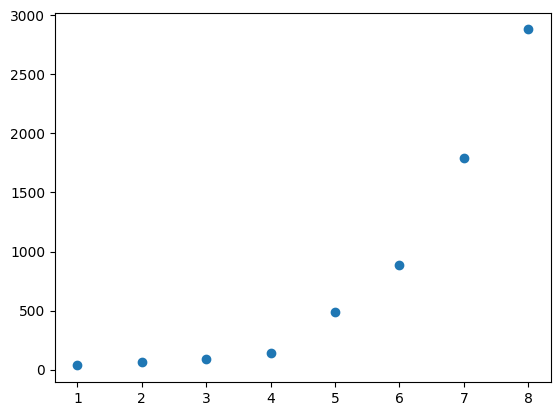

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
distances_millions_miles = [35, 67, 93, 142, 484, 889, 1790, 2880]

plt.plot([1,2,3,4,5,6,7,8], distances_millions_miles, 'o')

If want to plot smooth lines for a curved function, we'd probably want to evaluate at a lot of points.  matplotlib connects them with straight lines, but if they're close together, we get an illusion of a smooth curve.

np.linspace(begin,end,points) spaces *points* points evenly between *begin* and *end*.  If we pick a *points* value large enough, we can make a line graph that looks as though it curves.

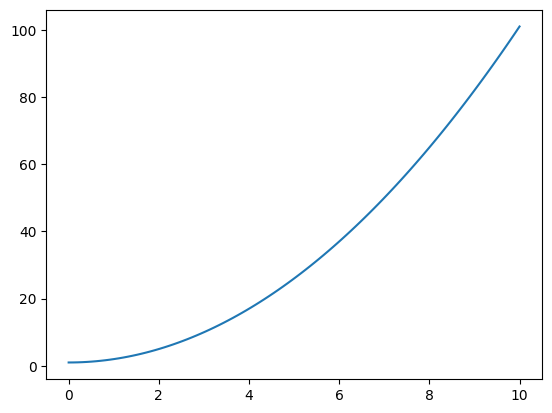

In [ ]:
#100 evenly spaced points between 1 an 10, the more evenly spaced the more it resembles the function.
# linspace tells how evenly spaced it is between 2 intervals
xpoints = np.linspace(0, 10, 100)
ypoints = xpoints ** 2 + 1
plt.plot(xpoints,ypoints)

You can plot multiple plots on top of each other, such as the raw scatter data as well as a fit, by just plotting in the same code box.

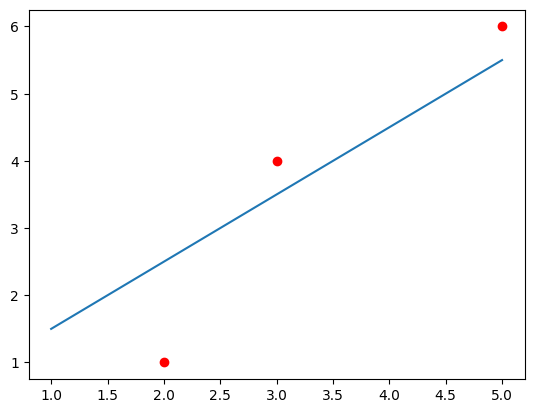

In [ ]:
plt.plot(my_points[:,0], my_points[:,1],'ro')
#myfit_x is the x values for the blue line, it indicates x-axis goes from 1 to 5
#myfit_y is the y values for the blue line, it indicates the y-axis goes from 1.5 to 5.5
myfit_x = np.linspace(1,5,100)
myfit_y = np.linspace(1.5, 5.5, 100)
plt.plot(myfit_x,myfit_y)

# 3D scatterplots

We can also make 3D plots with matplotlib.  These can get somewhat complex to make, so I just mostly want you to know the option is there, in case you want to research it further.


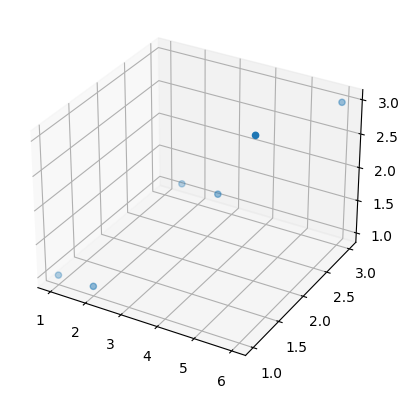

In [ ]:
# Boilerplate to set up ax
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = [1, 2, 3, 4, 5, 6]
y = [1, 1, 2, 2, 2, 3]
z = [1, 1, 2, 2, 3, 3]
ax.scatter(x,y,z)


# Exercise (4 min)

*At home, as an exercise, Cynthia tried plotting some of the numbers the man had given her.  The numbers were quite large, and she realized suddenly that she was looking at **world** population data.  But if that was true, the projections for the next two years were indeed quite dire...*

Use the data in the next code box to plot year on the x-axis and population on the y-axis.  Plot your datapoints as both scatterplot and line plot on the same plot.

*Data source for 2018-2023: https://www.worldometers.info/world-population/world-population-by-year/*

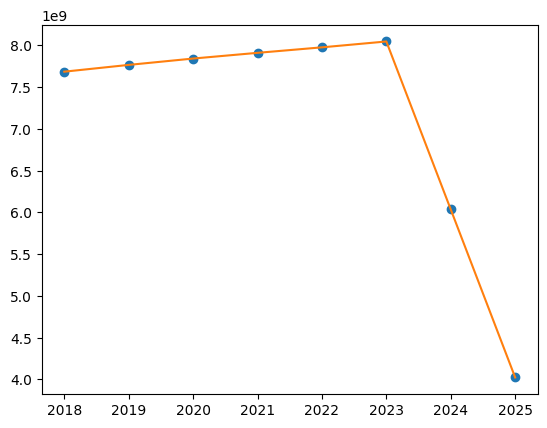

In [ ]:
years =[2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
population = [7683789828,7764951032,7840952880,7909295151,7975105156,8045311447, 6034201548, 4023156835]
plt.plot(years, population, 'o')
plt.plot(years, population)

# TODO

NameError: ignored